# Data Understanding

In [ ]:
"""
variables for defaulters 
1.annual_inc =>this will decide eligible for loan or not
2.application_type(individual/joint)=>Individual loan or two borrowers
3.avg_cur_bal=> important factor how much balance he has whether he will be able to pay emi or not
4.chargeoff_within_12_mths=> how many times he/she is defaulter in last 12 months,this will tell us about his/her behaviour
5.delinq_2yrs=>Defaulter for how much time.Again tells about borrower behaviour 
6.delinq_amnt=> for how much amount he /she is deliquent ,will help us to decide it a risky one or not 
7.emp_length=> he/she has continuous source of income or not




"""


# Data Sourcing

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings
import statistics
warnings.filterwarnings('ignore')



loandata=pd.read_csv('loan.csv')
loandata


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

##checking number of null values in each column

In [2]:
count=loandata.isnull().sum()
print(count)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [3]:
##removing current loandata

In [6]:
freshData=loandata[loandata['loan_status']!='Current']
freshData['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38577, dtype: object

In [ ]:
##we need to remove the columns which has null values. So we found below we have many columsn with 100 percent null values. removing them.

In [8]:
dict((loandata.isnull().sum()/loandata.shape[0])*100)

{'id': 0.0,
 'member_id': 0.0,
 'loan_amnt': 0.0,
 'funded_amnt': 0.0,
 'funded_amnt_inv': 0.0,
 'term': 0.0,
 'int_rate': 0.0,
 'installment': 0.0,
 'grade': 0.0,
 'sub_grade': 0.0,
 'emp_title': 6.191303472064859,
 'emp_length': 2.7066495455346575,
 'home_ownership': 0.0,
 'annual_inc': 0.0,
 'verification_status': 0.0,
 'issue_d': 0.0,
 'loan_status': 0.0,
 'pymnt_plan': 0.0,
 'url': 0.0,
 'desc': 32.58050708764509,
 'purpose': 0.0,
 'title': 0.027695948838029054,
 'zip_code': 0.0,
 'addr_state': 0.0,
 'dti': 0.0,
 'delinq_2yrs': 0.0,
 'earliest_cr_line': 0.0,
 'inq_last_6mths': 0.0,
 'mths_since_last_delinq': 64.66248709620565,
 'mths_since_last_record': 92.98537150338646,
 'open_acc': 0.0,
 'pub_rec': 0.0,
 'revol_bal': 0.0,
 'revol_util': 0.12589067653649572,
 'total_acc': 0.0,
 'initial_list_status': 0.0,
 'out_prncp': 0.0,
 'out_prncp_inv': 0.0,
 'total_pymnt': 0.0,
 'total_pymnt_inv': 0.0,
 'total_rec_prncp': 0.0,
 'total_rec_int': 0.0,
 'total_rec_late_fee': 0.0,
 'recoveries

In [93]:
#CleanData
CleanData=loandata[["loan_amnt","loan_status","term","int_rate","grade","issue_d","sub_grade","annual_inc","purpose","dti","emp_length","home_ownership","verification_status","addr_state"
]]
CleanData

,loan_amnt,loan_status,term,int_rate,grade,issue_d,sub_grade,annual_inc,purpose,dti,emp_length,home_ownership,verification_status,addr_state
0,5000,Fully Paid,36 months,10.65%,B,Dec-11,B2,24000.0,credit_card,27.65,10+ years,RENT,Verified,AZ
1,2500,Charged Off,60 months,15.27%,C,Dec-11,C4,30000.0,car,1.00,< 1 year,RENT,Source Verified,GA
2,2400,Fully Paid,36 months,15.96%,C,Dec-11,C5,12252.0,small_business,8.72,10+ years,RENT,Not Verified,IL
3,10000,Fully Paid,36 months,13.49%,C,Dec-11,C1,49200.0,other,20.00,10+ years,RENT,Source Verified,CA
4,3000,Current,60 months,12.69%,B,Dec-11,B5,80000.0,other,17.94,1 year,RENT,Source Verified,OR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,Fully Paid,36 months,8.07%,A,Jul-07,A4,110000.0,home_improvement,11.33,4 years,MORTGAGE,Not Verified,CO
39713,8500,Fully Paid,36 months,10.28%,C,Jul-07,C1,18000.0,credit_card,6.40,3 years,RENT,Not Verified,NC
39714,5000,Fully Paid,36 months,8.07%,A,Jul-07,A4,100000.0,debt_consolidation,2.30,< 1 year,MORTGAGE,Not Verified,MA
39715,5000,Fully Paid,36 months,7.43%,A,Jul-07,A2,200000.0,other,3.72,< 1 year,MORTGAGE,Not Verified,MD


In [11]:
count=CleanData.isnull().sum()
print(count)

loan_amnt                 0
loan_status               0
term                      0
int_rate                  0
grade                     0
issue_d                   0
sub_grade                 0
annual_inc                0
purpose                   0
dti                       0
emp_length             1075
home_ownership            0
verification_status       0
dtype: int64


# Data Type Conversion 

In [69]:
CleanData.dtypes

loan_amnt                int64
loan_status             object
term                    object
int_rate                object
grade                   object
issue_d                 object
sub_grade               object
annual_inc             float64
purpose                 object
dti                    float64
emp_length              object
home_ownership          object
verification_status     object
dtype: object

In [84]:
##from above analysis we found that int_rate is object and uses %. We need to  convert it into float.

CleanData["int_rate"] = CleanData["int_rate"].astype(float)  


In [90]:
CleanData.dtypes

##now we can see the data type of int_rate has changed into float from object.

loan_amnt                int64
loan_status             object
term                    object
int_rate               float64
grade                   object
issue_d                 object
sub_grade               object
annual_inc             float64
purpose                 object
dti                    float64
emp_length              object
home_ownership          object
verification_status     object
dtype: object

# Univariate , BiVariate,MultiVariate Analysis on Clean Data

In [23]:
##to get the statistical info of the clean data
CleanData.describe()

,loan_amnt,annual_inc,dti
count,39717.000000,3.971700e+04,39717.000000
mean,11219.443815,6.896893e+04,13.315130
std,7456.670694,6.379377e+04,6.678594
min,500.000000,4.000000e+03,0.000000
25%,5500.000000,4.040400e+04,8.170000
50%,10000.000000,5.900000e+04,13.400000
75%,15000.000000,8.230000e+04,18.600000
max,35000.000000,6.000000e+06,29.990000


In [34]:
##median of loan amount is 10000
print(statistics.median(CleanData['loan_amnt']))

10000


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

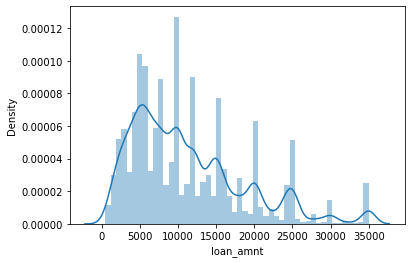

In [113]:
sns.distplot(CleanData["loan_amnt"])
## The Probability Distribution of the Loan Amount. Looks like majority has opted to apply a loan for USD $10000 which matches
## with the above stats also. 


<AxesSubplot:>

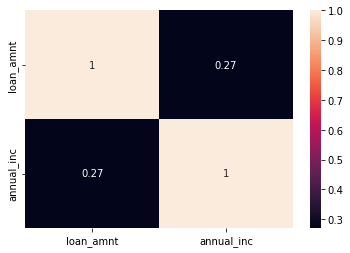

In [101]:
#Describing categorical column and continuous column list here.

cat_col=["annual_inc","loan_status","term","int_rate","grade","issue_d","sub_grade","dti","purpose","home_ownership","verification_status"]
cont_col=["loan_amnt","annual_inc"]

##This heatmap suggests a positive correlation between loan_amount and annual_inc.
sns.heatmap(CleanData[cont_col].corr(),annot=True)

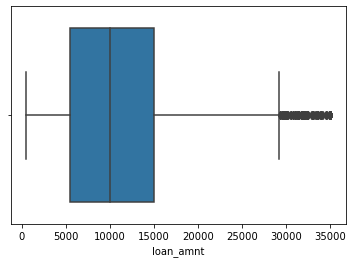

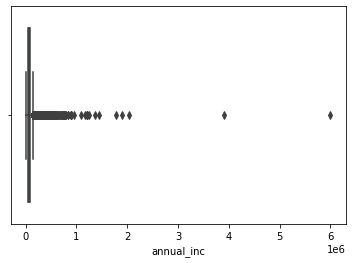

In [102]:

##Identify Outliers
cat_col=["annual_inc","loan_status","term","int_rate","grade","issue_d","sub_grade","dti","home_ownership","verification_status"]
cont_col=["loan_amnt","annual_inc"]

##Assumption is Few loan amounts are going beyond USD29000 based on the below outliers graph.
##Also very few people has huge income.

for i in cont_col:
    sns.boxplot(CleanData[i])
    plt.show()

In [59]:
CleanData[cont_col].describe()

,loan_amnt,annual_inc
count,39717.000000,3.971700e+04
mean,11219.443815,6.896893e+04
std,7456.670694,6.379377e+04
min,500.000000,4.000000e+03
25%,5500.000000,4.040400e+04
50%,10000.000000,5.900000e+04
75%,15000.000000,8.230000e+04
max,35000.000000,6.000000e+06


---------------- annual_inc -------------------


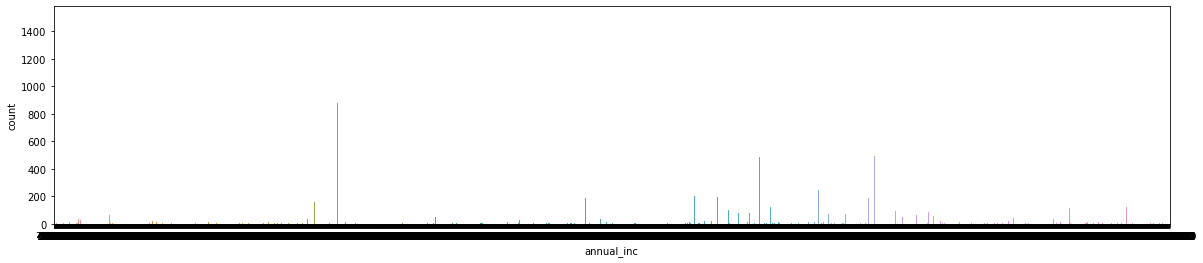

---------------- loan_status -------------------


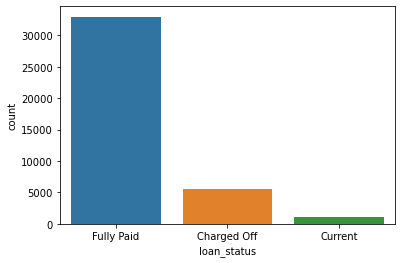

---------------- term -------------------


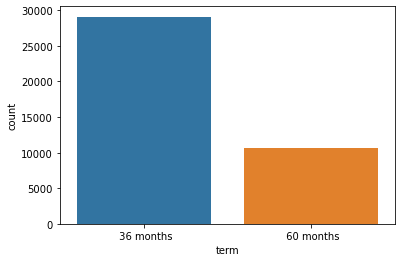

---------------- int_rate -------------------


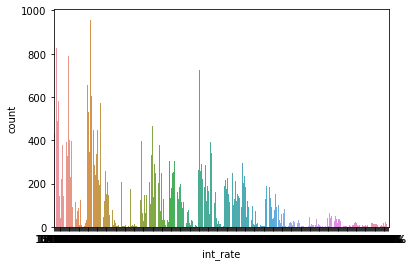

---------------- grade -------------------


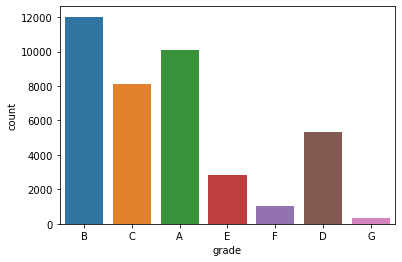

---------------- issue_d -------------------


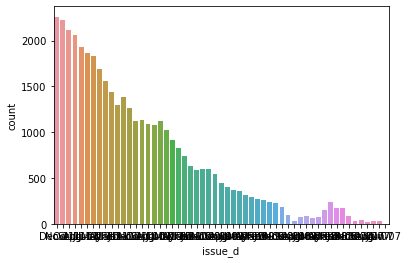

---------------- sub_grade -------------------


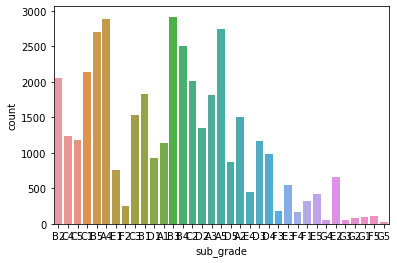

---------------- dti -------------------


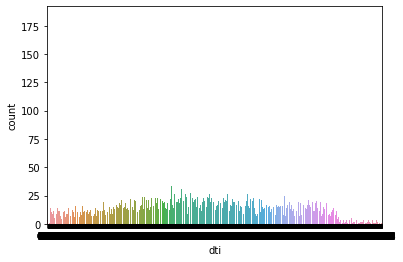

---------------- home_ownership -------------------


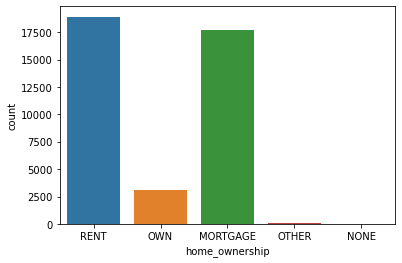

---------------- verification_status -------------------


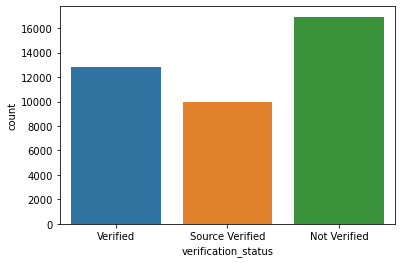

In [110]:
plt.figure(figsize=(20,4))
for i in cat_col:
    print("----------------",i,"-------------------")
    sns.countplot(CleanData[i])
    plt.show()
    
##countplots for all the elements present in categorical column.
##Majority of the Loan Takers lives under Rent.
##Maximum number of loan takers has already paid their loans
##More loan takers are opting for 36 months term. 
##B grade loans are more popular among loan takers.Sub_grade B3 type of loan is topping the charts.
##Majority of the loan takers income is not verified by Lending Club. This is major flaw which needs to be rectified if LC wants to avoid risky loan takers.


<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

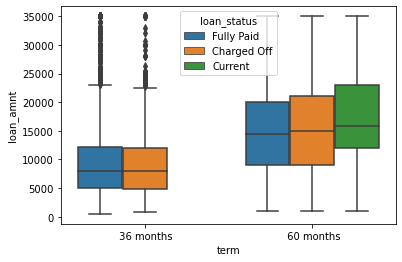

In [66]:
sns.boxplot(x=CleanData["term"],y=CleanData["loan_amnt"],hue=CleanData["loan_status"])
## The defaulters rate is high in 60 months tenure. Looks like most people who took high loan amount in high interest rate have become defaulters and facing it hard to return back the loan.


<AxesSubplot:xlabel='term', ylabel='int_rate'>

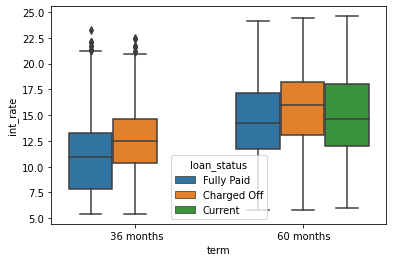

In [91]:
sns.boxplot(x=CleanData["term"],y=CleanData["int_rate"],hue=CleanData["loan_status"]) 
##conclusion is The defaulters rate is high in 60 months tenure. Looks like most people who took high loan amount in high interest rate have become defaulters and facing it hard to return back the loan.


<AxesSubplot:xlabel='addr_state', ylabel='Count'>

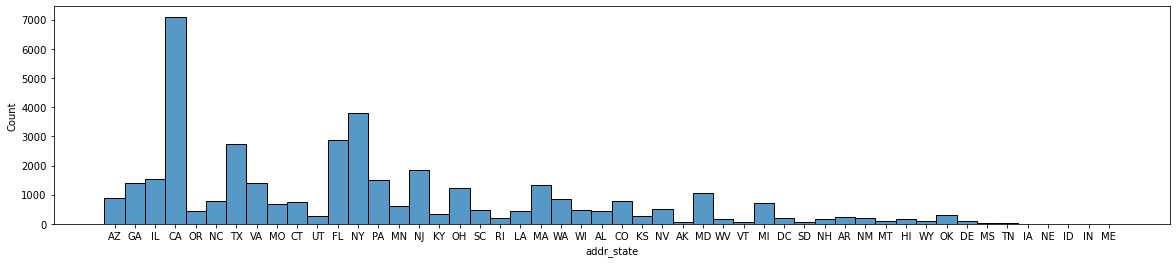

In [109]:
plt.figure(figsize=(20,4))
sns.histplot(CleanData["addr_state"]) 
##conclusion is CA and NY residents are most of the loan takers.

<AxesSubplot:xlabel='purpose', ylabel='Count'>

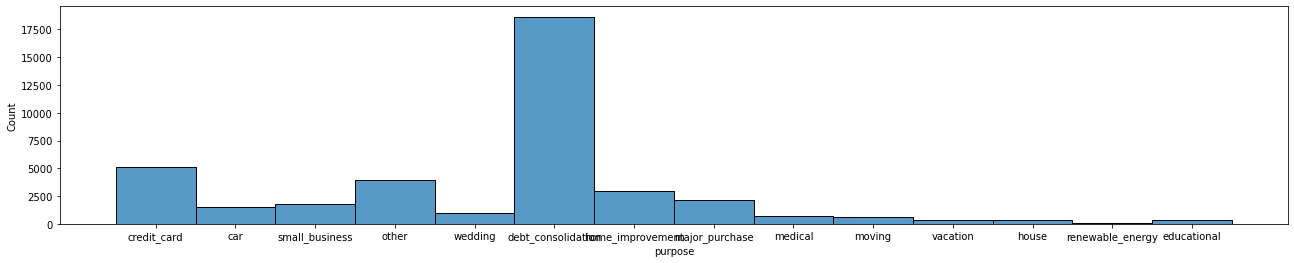

In [112]:
plt.figure(figsize=(22,4))
sns.histplot(CleanData["purpose"]) 
##conclusion is people take loans the most for debt_consolidation and least for renewable energy.

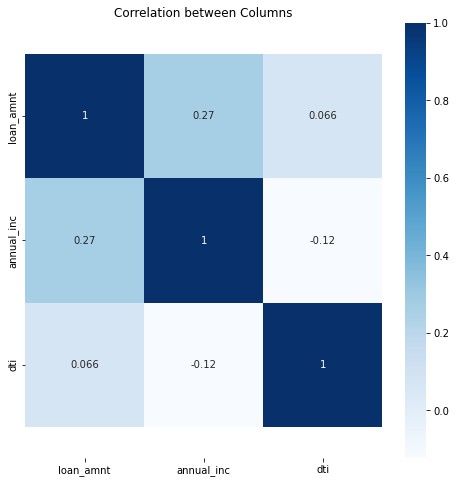

In [120]:
#Finding correlation matric
corr_matrix = CleanData.corr()
plt.figure(figsize=(8,8))
#plotting correlatioon matric on a heat map
ac = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ac.get_ylim()
ac.set_ylim(top+0.25, bottom-0.25)
plt.title("Correlation between Columns")
plt.show()